In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [ ]:
# Cargar datos
#data = np.loadtxt(os.path.join('Datasets', 'capacidad_adquisitiva.csv'), delimiter=';')
#from numpy import genfromtxt
#data = genfromtxt(os.path.join('Datasets', 'capacidad_adquisitiva.csv'), delimiter=';')
data = np.loadtxt('/content/gdrive/MyDrive/SIS420/midataset/Maintenance Naval Vessel.csv', delimiter=",",skiprows=1)
#print(data)
X = data[:, :17]
y = data[:, 17]
m = y.size
#print(X)
#print(y)
# imprimir algunos puntos de datos
#print('{:>8s}{:>10s}'.format(X, y))
#print('-'*26)
for i in range(100):
    print('{:8.4f}{:8.4f}{:8.4f}{:8.4f}{:8.4f}{:8.4f}{:8.4f}{:8.4f}{:8.4f}{:8.4f}{:8.4f}{:8.4f}{:8.4f}{:8.4f}{:8.4f}{:8.4f}{:8.4f}'.format(X[i, 0], X[i, 1],X[i, 2],X[i, 3],X[i, 4],X[i, 5],X[i, 6],X[i, 7],X[i, 8],X[i, 9],X[i, 10],X[i, 11],X[i, 12],X[i, 13],X[i, 14],X[i, 15],X[i, 16], y[i]))


In [ ]:
def plotData(x, y):
    #Grafica los puntos x e y en una figura nueva.

    fig = pyplot.figure()  # abre una nueva figura

    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Edad personas')
    pyplot.xlabel('Capacidad adquisitiva 1,000s')


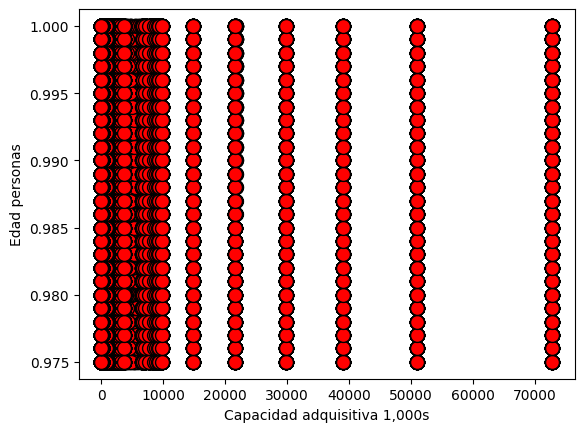

In [ ]:
plotData(X, y)

In [ ]:
X = np.concatenate([X, X * X], axis=1)

In [ ]:
print(X)

[[2.08800000e+00 6.00000000e+00 6.96018000e+03 ... 1.13529025e+02
  8.23690000e-02 9.02500000e-01]
 [3.14400000e+00 9.00000000e+00 8.37922900e+03 ... 1.71243396e+02
  6.70810000e-02 9.02500000e-01]
 [4.16100000e+00 1.20000000e+01 1.47243950e+04 ... 3.27935881e+02
  1.28164000e-01 9.02500000e-01]
 ...
 [7.14800000e+00 2.10000000e+01 3.90038670e+04 ... 1.77274682e+03
  6.95556000e-01 1.00000000e+00]
 [8.20600000e+00 2.40000000e+01 5.09925790e+04 ... 3.37142810e+03
  1.32020100e+00 1.00000000e+00]
 [9.30000000e+00 2.70000000e+01 7.27751300e+04 ... 7.40752849e+03
  2.90361600e+00 1.00000000e+00]]


In [ ]:
def featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)

    # Encuentra las características con desviación estándar igual a cero
    zero_std_indices = np.where(sigma == 0)[0]

    # Elimina las características con desviación estándar igual a cero
    X_norm = np.delete(X_norm, zero_std_indices, axis=1)
    mu = np.delete(mu, zero_std_indices)
    sigma = np.delete(sigma, zero_std_indices)

    # Normaliza las características restantes
    X_norm = (X_norm - mu) / sigma

    return X_norm, mu, sigma

In [ ]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)


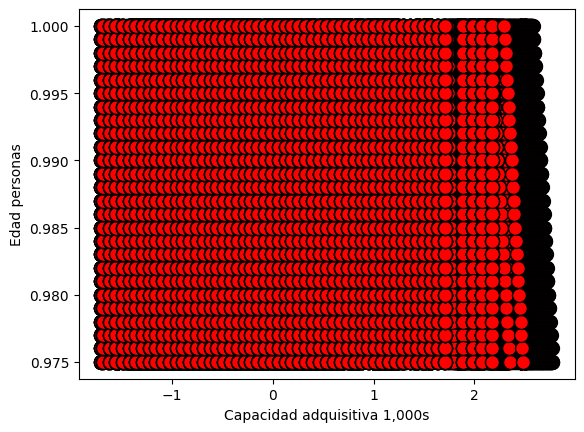

In [ ]:
plotData(X_norm, y)

In [ ]:

X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [ ]:
print(X)

[[ 1.00000000e+00 -1.17244985e+00 -1.16209301e+00 ... -6.91198688e-01
  -6.38685439e-01 -1.68442193e+00]
 [ 1.00000000e+00 -7.70337049e-01 -7.74771950e-01 ... -6.67538905e-01
  -6.54596478e-01 -1.68442193e+00]
 [ 1.00000000e+00 -3.83075001e-01 -3.87450891e-01 ... -6.03303429e-01
  -5.91024136e-01 -1.68442193e+00]
 ...
 [ 1.00000000e+00  7.54340671e-01  7.74512286e-01 ... -1.10087867e-02
  -5.08962096e-04  1.71259327e+00]
 [ 1.00000000e+00  1.15721505e+00  1.16183335e+00 ...  6.44364407e-01
   6.49592468e-01  1.71259327e+00]
 [ 1.00000000e+00  1.57379783e+00  1.54915440e+00 ...  2.29894812e+00
   2.29753707e+00  1.71259327e+00]]


In [ ]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J


In [ ]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

In [ ]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 100000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(17)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# La capacidad adquisitiva de una persona de 33 años
X_array = [45, 6, 8, 1546, 7864, 9, 9, 686, 272, 924, 2, 1, 2, 2, 3, 0.24, 0.75]
X_array[1:17] = (X_array[1:17] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('La capacidad adquisitiva para una persona de 33 (usando el descenso por el gradiente): ${:.0f}'.format(price))

In [ ]:
plotData(X[:, 1], y)
pyplot.plot(X[:, 1], np.dot(X, theta), '-')

In [ ]:
X_array = [1, 23, 529]
X_array[1:3] = (X_array[1:3] - mu) / sigma

In [ ]:
X_array[1:3]
print(np.dot(X_array, theta))

7076.418790199557


In [ ]:
# Cargar datos
data = np.loadtxt('/content/gdrive/MyDrive/SIS420/midataset/Naval Vessel presion de salida.csv', delimiter=",",skiprows=1)
X = data[:, :17]
y = data[:, 17]
m = y.size
X_original = X.copy()
X = np.concatenate([X, X * X], axis=1)
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [ ]:
def normalEqn(X, y):

    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

    return theta

In [ ]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X, y);

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));

# Estimar el precio para una casa de superficie de 1650 sq-ft y tres dormitorios

X_array = [45, 6, 8, 1546, 7864, 9, 9, 686, 272, 924, 2, 1, 2, 2, 3, 0.24, 0.75, 7.876]
price = np.dot(X_array, theta)

print('Precio predecido para una cada de superficie de 1650 sq-ft y 3 dormitorios (usando la ecuación de la normal): ${:.0f}'.format(price))

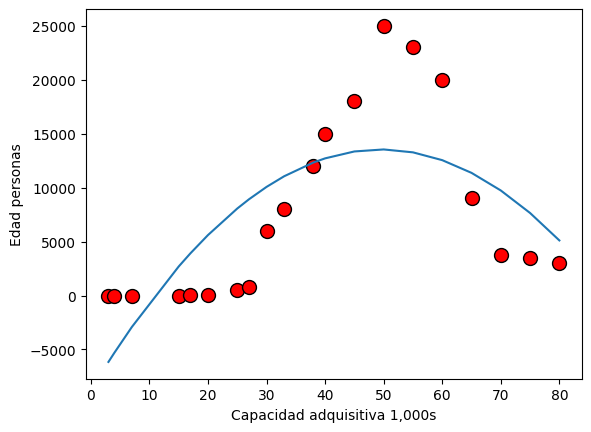

In [ ]:
plotData(X[:, 1], y)
#X = np.concatenate([np.ones((m, 1)), X], axis=1)
#X = np.concatenate([X, X * X], axis=1)

pyplot.plot(X[:, 1], np.dot(X, theta), '-')